In [1]:
!mkdir -p ~/agave

%cd ~/agave

!pip3 install --upgrade setvar

import re
import os
import sys
from setvar import *
from time import sleep

# This cell enables inline plotting in the notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
!auth-tokens-refresh

/home/jovyan/agave
Requirement already up-to-date: setvar in /opt/conda/lib/python3.6/site-packages
Token for agave.prod:stevenrbrandt successfully refreshed and cached for 14400 seconds
4025311832ceeb576cdd07cea596e8a


In [63]:
writefile("input.txt","""
!INPUT FILE FOR FUNWAVE_TVD
  ! NOTE: all input parameter are capital sensitive
  ! --------------------TITLE-------------------------------------
  ! title only for log file
TITLE = VESSEL
  ! -------------------HOT START---------------------------------
HOT_START = F
FileNumber_HOTSTART = 1
  ! -------------------PARALLEL INFO-----------------------------
  ! 
  !    PX,PY - processor numbers in X and Y
  !    NOTE: make sure consistency with mpirun -np n (px*py)
  !    
PX = 4
PY = 1
  ! --------------------DEPTH-------------------------------------
  ! Depth types, DEPTH_TYPE=DATA: from depth file
  !              DEPTH_TYPE=FLAT: idealized flat, need depth_flat
  !              DEPTH_TYPE=SLOPE: idealized slope, 
  !                                 need slope,SLP starting point, Xslp
  !                                 and depth_flat
DEPTH_TYPE = FLAT
DEPTH_FLAT = 10.0
  ! -------------------PRINT---------------------------------
  ! PRINT*,
  ! result folder
RESULT_FOLDER = output/

  ! ------------------DIMENSION-----------------------------
  ! global grid dimension
Mglob = 500
Nglob = 100

  ! ----------------- TIME----------------------------------
  ! time: total computational time/ plot time / screen interval 
  ! all in seconds
TOTAL_TIME = 10.0
PLOT_INTV = 1.0
PLOT_INTV_STATION = 50000.0
SCREEN_INTV = 1.0
HOTSTART_INTV = 360000000000.0

WAVEMAKER = INI_GAU
AMP = 3.0
Xc = 250.0
Yc = 50.0
WID = 20.0

  ! -----------------GRID----------------------------------
  ! if use spherical grid, in decimal degrees
  ! cartesian grid sizes
DX = 1.0
DY = 1.0
  ! ----------------SHIP WAKES ----------------------------
VESSEL_FOLDER = ./
NumVessel = 2
  ! -----------------OUTPUT-----------------------------
ETA = T
U = T
V = T
""")

Writing file `input.txt'


In [64]:
writefile("run.sh","""
#!/bin/bash
export LD_LIBRARY_PATH=/usr/local/lib
mkdir -p rundir
cd ./rundir
cp ../input.txt .
mpirun -np 4 ~/FUNWAVE-TVD/src/funwave_vessel
""")

Writing file `run.sh'


In [65]:
!scp -P 10022 input.txt run.sh $VM_IPADDRESS:.
!ssh -p 10022 $VM_IPADDRESS bash run.sh

input.txt                                     100% 1754     1.7KB/s   00:00    
run.sh                                        100%  141     0.1KB/s   00:00    
 BATHY_CORRECTION DOES NOT EXIST. USE DEFAULT VALUE
 INI_UVZ DOES NOT EXIST. USE DEFAULT VALUE
 WaterLevel DOES NOT EXIST. USE DEFAULT VALUE
 ETA_LIMITER DOES NOT EXIST. USE DEFAULT VALUE
 EqualEnergy DOES NOT EXIST. USE DEFAULT VALUE
 PERIODIC DOES NOT EXIST. USE DEFAULT VALUE
 DIFFUSION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 DIRECT_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 FRICTION_SPONGE DOES NOT EXIST. USE DEFAULT VALUE
 OBSTACLE_FILE DOES NOT EXIST. USE DEFAULT VALUE
 BREAKWATER_FILE DOES NOT EXIST. USE DEFAULT VALUE
 DISPERSION DOES NOT EXIST. USE DEFAULT VALUE
         DISPERSION Default:  DISPERSION
 Gamma1 DOES NOT EXIST. USE DEFAULT VALUE
        Gamma1 Default:  1.0: DISPERSION
 Gamma2 DOES NOT EXIST. USE DEFAULT VALUE
              Gamma2 Default:  1.0: Full nonlinear
 Beta_ref DOES NOT EXIST. USE DEFAULT VALUE
  

 Simulation takes   26.352089138003066      seconds
 Normal Termination!


In [66]:
!scp -q -r -P 10022 $VM_IPADDRESS:rundir/output .

In [67]:
!ls output

eta_00001  eta_00009  eta_00017  u_00004  u_00012  u_00020  v_00007  v_00015
eta_00002  eta_00010  eta_00018  u_00005  u_00013  u_00021  v_00008  v_00016
eta_00003  eta_00011  eta_00019  u_00006  u_00014  v_00001  v_00009  v_00017
eta_00004  eta_00012  eta_00020  u_00007  u_00015  v_00002  v_00010  v_00018
eta_00005  eta_00013  eta_00021  u_00008  u_00016  v_00003  v_00011  v_00019
eta_00006  eta_00014  u_00001	 u_00009  u_00017  v_00004  v_00012  v_00020
eta_00007  eta_00015  u_00002	 u_00010  u_00018  v_00005  v_00013  v_00021
eta_00008  eta_00016  u_00003	 u_00011  u_00019  v_00006  v_00014


In [16]:
import runagavecmd as r

In [13]:
!files-upload -F input.txt -S ${STORAGE_MACHINE} ./
r.runagavecmd("LD_LIBRARY_PATH=/usr/local/lib "+
            "mpirun -np 4 /home/jovyan/FUNWAVE-TVD/src/funwave_vessel && "+
            "tar czf output.tgz output",
            "agave://${STORAGE_MACHINE}/input.txt")

Uploading input.txt...
######################################################################## 100.0%
REMOTE_COMMAND=LD_LIBRARY_PATH=/usr/local/lib mpirun -np 4 /home/jovyan/FUNWAVE-TVD/src/funwave_vessel && tar czf output.tgz output
INPUTS={"datafile":"agave://jetstream-storage-stevenrbrandt/input.txt"}
Writing file `job-remote.txt'
OUTPUT=Successfully submitted job 30044908082818585-242ac11b-0001-007
JOB_ID=30044908082818585-242ac11b-0001-007
STAT=PENDING
STAT=PENDING
STAT=PENDING
STAT=STAGING_INPUTS
STAT=STAGED
STAT=SUBMITTING
STAT=SUBMITTING
STAT=RUNNING
STAT=RUNNING
STAT=RUNNING
STAT=RUNNING
STAT=RUNNING
STAT=FINISHED
CMD=jobs-output-get 30044908082818585-242ac11b-0001-007 fork-command-1.out
All done! Output follows.
Reading file `fork-command-1.out'
 BATHY_CORRECTION DOES NOT EXIST. USE DEFAULT VALUE
 INI_UVZ DOES NOT EXIST. USE DEFAULT VALUE
 WaterLevel DOES NOT EXIST. USE DEFAULT VALUE
 WAVEMAKER DOES NOT EXIST. USE DEFAULT VALUE
                            No WaveMaker
 ETA_L

In [95]:
!rm -fr output output.tgz
!jobs-output-get ${JOB_ID} output.tgz
!tar xf output.tgz
!ls output

######################################################################## 100.0%
{"status":"error","message":"Unable to locate job data. Work folder no longer exists.","version":"2.2.6-r4f1bf09"}

tar: This does not look like a tar archive

gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now
ls: cannot access 'output': No such file or directory


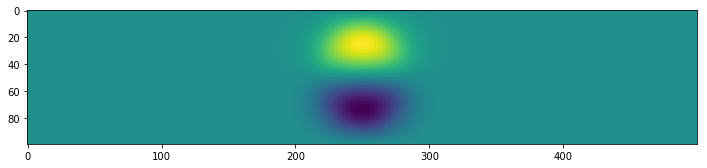

In [49]:
data = np.genfromtxt("output/v_00003")
fig = plt.figure(figsize=(12,12))
pltres = plt.imshow(data[::-1,:])
plt.show()

In [69]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

anim_data = []
for d in range(10):
    fn = "output/eta_%05d" % (d+1)
    print(fn)
    anim_data += [np.genfromtxt(fn)]

def animate(i):
    pltres.set_data(anim_data[i])
    return pltres,

anim = animation.FuncAnimation(fig, animate, frames=10, interval=200, repeat=True)
HTML(anim.to_html5_video())

output/eta_00001
output/eta_00002
output/eta_00003
output/eta_00004
output/eta_00005
output/eta_00006
output/eta_00007
output/eta_00008
output/eta_00009
output/eta_00010


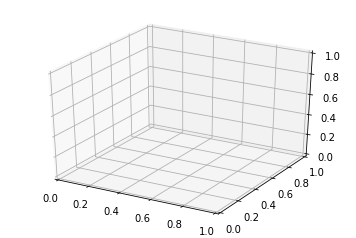

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')